cykliczne warunki brzegowe

gęstość na całym układzie, nie na pojedynczej komórce

MCS = L = 100 (minimum)

ruch samochodów pokazujemy na macierzy, gdzie oś pionowa to MCS, a oś pozioma to rozmiar układu

kilka macierzy dla różnych p i rho, najlepiej na jednym subplocie 3x3

wykres prędkości od zagęszczenia

średnia prędkość po obu osiach, L=100 (minimum), dla 3 różnych p na jednym wykresie

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import product
from matplotlib import style

In [2]:
plt.rcParams['figure.dpi'] = 130

In [3]:
class Car:

    def __init__(self, v: int, pos: int):
        
        self.v = v
        self.pos = pos

    def move(self, L):

        self.pos = (self.pos + self.v) % L

In [65]:
class Traffic:

    def __init__(self, L: int, vmax: int, rho: float):

        self.L = L
        self.vmax = vmax
        self.rho = rho
        self.cars = self.initCars()
        self.positions = [car.pos for car in self.cars]
    
    def initCars(self):

        indices = list(range(self.L))
        positions = np.random.choice(indices, replace=False, size=int(self.rho*self.L))
        positions = np.sort(positions)
        cars = [Car(self.vmax, pos) for pos in positions]

        return cars
    
    def adjustVelocities(self, p):

        unifs = np.random.uniform(size=len(self.cars))
        Ncars = len(self.cars)

        if Ncars > 1:
            for i in range(Ncars):

                car = self.cars[i]

                if car.v < self.vmax:
                    car.v += 1

                distance = (self.cars[(i+1) % Ncars].pos - car.pos) % self.L - 1

                if distance < car.v:
                    car.v = distance

                if car.v >= 1 and unifs[i] < p:
                    car.v -= 1

    def simulate(self, MCS, p, measureV=False):

        steps = np.zeros((MCS, self.L))
        steps[0, self.positions] = 1

        if measureV == True:
            avgVelocities = np.zeros(MCS)
            avgVelocities[0] = self.vmax

        for ts in range(1, MCS):

            self.adjustVelocities(p)

            if measureV == True:
                avgVelocities[ts] = np.mean([car.v for car in self.cars])

            for i in range(len(self.cars)):
                car = self.cars[i]
                car.move(self.L)
                self.positions[i] = car.pos

            steps[ts, self.positions] = 1

        return steps, np.mean(avgVelocities) if measureV == True else steps


In [37]:
rhos = [0.1, 0.2, 0.6]
ps = [0.3, 0.5, 0.7]
params = list(product(rhos, ps))
rows = [0, 1, 2]
cols = [0, 1, 2]
axes = list(product(rows, cols))

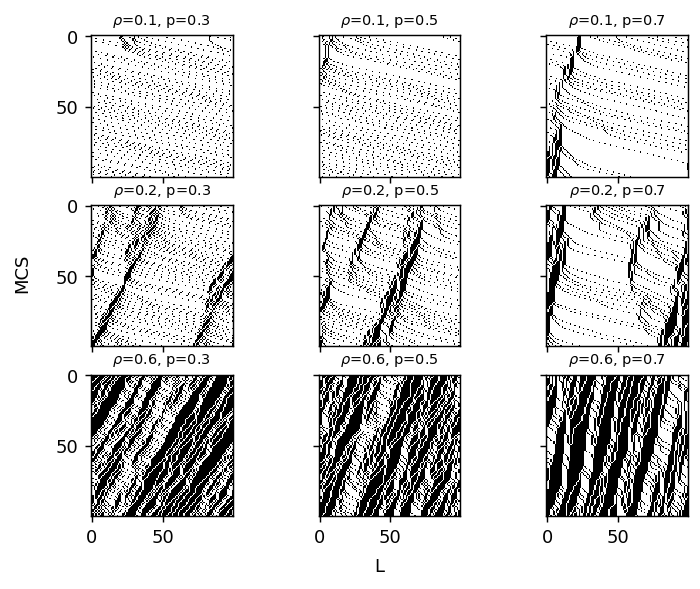

In [38]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
custom_cmap = ListedColormap(['white', 'black'])

for i, x in enumerate(axes):
    T = Traffic(100, 5, params[i][0])
    grid = T.simulate(100, params[i][1]) 
    axs[axes[i][0], axes[i][1]].imshow(grid, cmap=custom_cmap)
    axs[axes[i][0], axes[i][1]].set_title(rf'$\rho$={params[i][0]}, p={params[i][1]}', size=8)

fig.text(0.5, 0.02, 'L', ha='center')
fig.text(0.06, 0.5, 'MCS', va='center', rotation='vertical')
plt.show()

In [66]:
rhos = np.arange(0.01, 1, 0.01)
ps = [0.3, 0.5, 0.7]
vs = {}

for i, p in enumerate(ps):
    avgVelocities = np.zeros(len(rhos))
    for j, rho in enumerate(rhos):
        T = Traffic(100, 5, rho)
        _, avgV = T.simulate(100, p, measureV=True)
        avgVelocities[j] = avgV
    vs[p] = avgVelocities

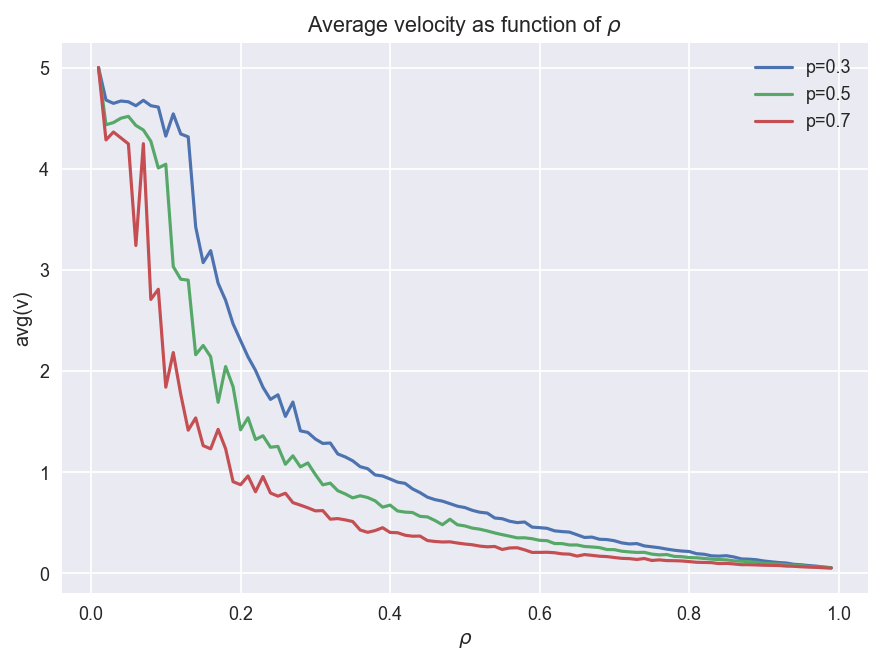

In [73]:
style.use('seaborn-v0_8')
plt.plot(rhos, vs[0.3], label='p=0.3')
plt.plot(rhos, vs[0.5], label='p=0.5')
plt.plot(rhos, vs[0.7], label='p=0.7')
plt.legend()
plt.title(r'Average velocity as function of $\rho$')
plt.xlabel(r'$\rho$')
plt.ylabel('avg(v)')
plt.show()
